# Notebook 1_4

## First-Order Physical Systems

#### Student Learning Outcomes
* Learn how to derive mathematical expressions for first-order systems.
* Learn the concept of the step signal.
* Start to learn the concept of the time constant.

--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt


<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Car Interior Heating</h2>
</div>

Let's start with such example:  
You get into a car on a cold winter morning, and turn on the heater to warm up the car's interior.
How can we model it?



First of all, lets define a time-dependent variable as our system output:

$$T(t) = T_{\mathrm{inside}}(t) - T_{\mathrm{outside}}$$

Here,
* $T(t)$ is the temperature difference between the car cabin and the outside environment.
* $T_{\mathrm{inside}}(t)$ is the inside temperature
* $T_{\mathrm{outside}}$ is the outside temperature.

We simply assume the outside temperature doesn't change in this heating process, so it is a constant.

Today's morning temperature is 36 degree Fahrenheit.

Create a new Markdown cell, write down the temperature of today's morning in Celsius.

Note Celsius is a SI derived unit, but Fahrenheit is not.

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Temperature: 0.5 pts</strong>
</span>

2.22 degree Celsius

From the law of thermodynamics, we have such 1st order diff equation:

$$C\frac{dT(t)}{dt}=\dot Q_{\mathrm{heater}}(t)-GT(t)$$

* $C$ is the thermal capacitance of the car cabin
* $G$ is the thermal conductance of the car cabin
* $\dot Q_{\mathrm{heater}}(t)$ is the heater power, in Joules per second (J/s), or Watts (W)
  
Create a new Markdown cell, answer: what is the SI unit of $C$ and $G$?

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>SI Unit answer: 0.5 pts</strong>
</span>

C unit: (J/s)/(K/s) = J/K

G unit: W/K

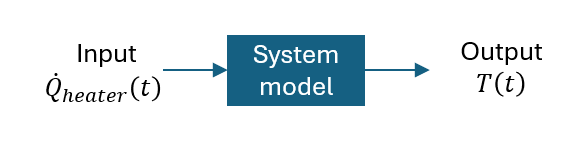

So far, our diff equation can be treated as such a system:

* Input: $\dot Q_{\mathrm{heater}}(t)$, the heater power. It is the cause.
* Output: $T(t)$, the temperature difference between the car cabin and the outside environment. It is the effect.


<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Another System Input Type -- Step Input</h2>
</div>

In the last notebook, we explored a type of system input called the **Impulse Signal**. 

Impulse is represented by the Dirac delta function, $\delta(t)$, and is for signals that occur over an extremely short duration.

Or simply says, it models a behavior -- sudden on-and-off.

In this example, after we turn on the heater, it keeps on. Such input requires another way to model.

It is called **Step Signal**.

In math, a unit step is denoted as $u(t)$,
$$
u(t) =
\begin{cases} 
0, & \text{if } t < 0 \\
1, & \text{if } t \geq 0
\end{cases}
$$

- For $ t < 0 $, the function is \( 0 \) (Off).
- For $ t \geq 0 $, the function is \( 1 \) (On).

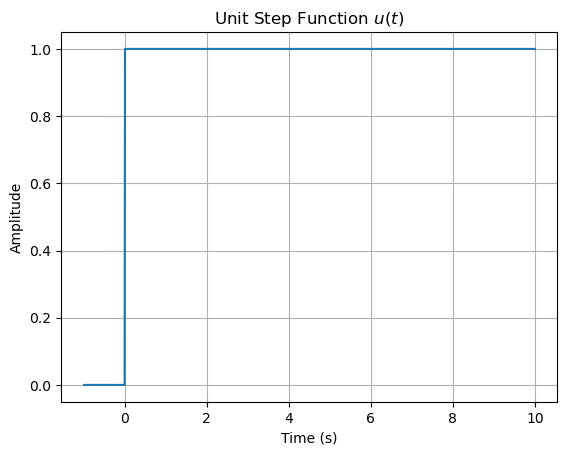

In [2]:
# Visualize a unit step in plot
t = np.linspace(-1, 10, 1000)  
u_t = np.heaviside(t, 1)     

# Plotting
plt.plot(t, u_t, color="tab:blue")
plt.title("Unit Step Function $u(t)$")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)


In our example, assume the heater power of our car is 6 kW.

Create a markdown cell below, express $\dot Q_{\mathrm{heater}}(t)$ in terms of unit step $u(t)$.

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Heater power: 1 pt</strong>
</span>

$\dot Q_{\mathrm{heater}}(t) = 6000u(t)$

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: System Output</h2>
</div>

Let's use ChatGPT to figure it out the system output.

------------
> Copy and Paste these 3 lines into ChatGPT,
<br>also based on your task 2 answer, revise the question mark in Line 2:
```markdown
* System model: $$C\frac{dT(t)}{dt}=\dot Q_{\mathrm{heater}}(t)-GT(t)$$
* System input: $$ \dot Q_{\mathrm{heater}}(t) = ??? $$ (step input)
how to solve for System output $T(t)$ using separation of variables approach (not Laplace approach)"
```
----------

Create a Markdown cell below, only type the final answer for $T(t)$ given by ChatGPT.

$$T(t) = \frac{6000}{G} + \left(- \frac{6000}{G}\right) e^{-\frac{G}{C} t}$$

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Result of output: 1 pt</strong>
</span>

Assume:
* $C$ is 10,000 (with SI unit)
* $G$ is 200 (with SI unit)

Create a Python Code cell below, plot the $T(t)$.

Note you may need to type constants $C$, $G$ in Python

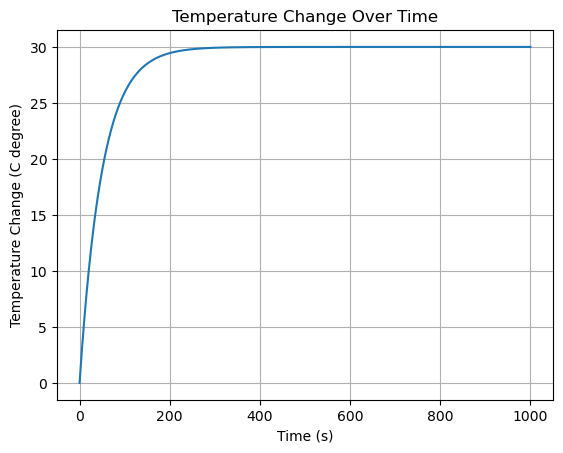

In [5]:
C = 10000
G = 200
t = np.linspace(0, 1000, 1000)
T_t = 6000/G + (-6000/G)*np.exp(-G/C*t)
plt.plot(t, T_t)
plt.title("Temperature Change Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Change (C degree)")
plt.grid(True)

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Plot of $T(t)$: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 4: Unchanged System Model, Changed Step Input</h2>
</div>

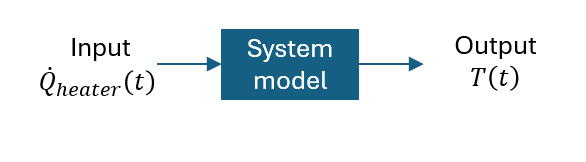

Assume the heater of my car has a problem. It can only provide 4 kW power today.

This means that our system model (diff equation) is unchanged, but input changes.
    
Write down the expression for the new output. Plot two outputs together in a figure
* Output when input power is 6 kW
* Output when input power is 4 kW

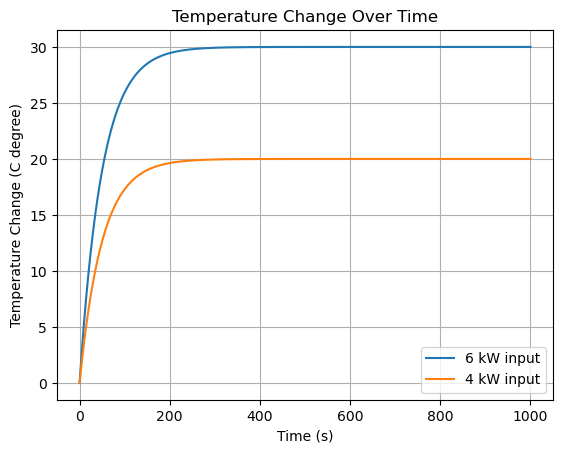

In [6]:
T_t = 6000/G + (-6000/G)*np.exp(-G/C*t)
T_t2 = 4000/G + (-4000/G)*np.exp(-G/C*t)

plt.plot(t, T_t, label="6 kW input")
plt.plot(t, T_t2, label="4 kW input")

plt.title("Temperature Change Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Change (C degree)")
plt.grid(True)
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python Plot of $T(t)$: 1 pt</strong>
</span>

Observe the figure, you may notice:

**Even with different inputs, both curves flatten at the same time.**

The reason for this lies in the math expression for the system's output:

the only term that depends on time is the exponential term: $e^{-\frac{C}{G}t}$ 



In this exponential term, both $C$, $G$ are from the system model, not from the system input.

So, regardless of different inputs, our system output always changes at the same rate.

In fact, this leads to a concept of **Time Constant**. We will continue to cover it next.

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>

Re-call the procedures:

* The menu at the top of the Notebook has File, Edit, View, Run, etc.  
Choose File $\rightarrow$ Save and Export Notebook As... $\rightarrow$  HTML  
This should make an HTML file in your current folder . 
  
* Open the HTML file (it will open in a browser)  
Then use the browser to print as pdf  
(In some computers, if cannot print html in correct pdf,  
google "html to pdf converter free" and there are multiple websites can do it)

* Turn in the pdf to Blackboard.

